Saving Social_Network_Ads.csv to Social_Network_Ads (8).csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64
Akurasi: 0.89
Confusion Matrix:
 [[65  3]
 [ 8 24]]
Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.89      0.96      0.92        68
           1       0.89      0.75      0.81        32

    accuracy                           0.89       100
   macro avg       0.89      0.85      0.87       100
weighted avg       0.89      0.89      0.89       100



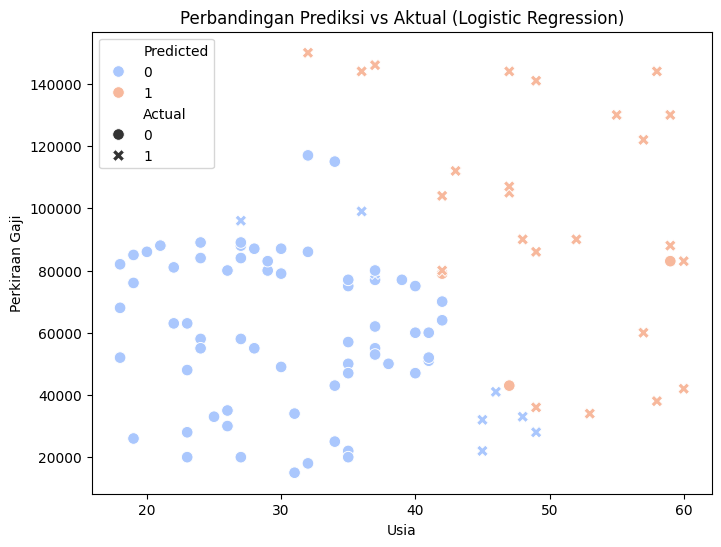

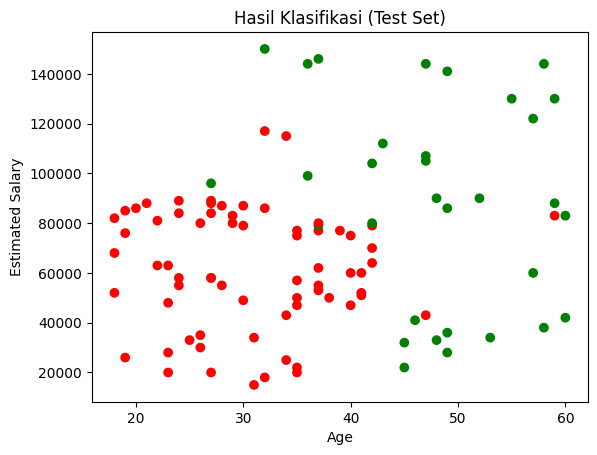

In [ ]:
#langkah 1
from google.colab import files
import pandas as pd

# Upload file
uploaded = files.upload()

# Membaca dataset
df = pd.read_csv('Social_Network_Ads.csv')
df.head()

#langkah 2
# Melihat info data
df.info()

# Mengecek nilai kosong
print(df.isnull().sum())

# Jika ada kolom kategorikal (misalnya Gender), ubah ke numerik
df = pd.get_dummies(df, drop_first=True)
df.head()

#langkah3 Pemisahan Fitur dan Target
X = df.drop('Purchased', axis=1)   # fitur
y = df['Purchased']                 # target

# langkah 4 Split Data Train & Test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=0)

#langkah 5 Membuat Model Machine Learning logistic regression
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

#langkah 6 evaluasi model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = model.predict(X_test)

print("Akurasi:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Laporan Klasifikasi:\n", classification_report(y_test, y_pred))

#langkah 7 visualisasi
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
import seaborn as sns

# Visualisasi data training
X_set, y_set = X_test.values, y_test.values
X1, X2 = np.meshgrid(
    np.arange(start=X_set[:, 0].min()-1, stop=X_set[:, 0].max()+1, step=0.1),
    np.arange(start=X_set[:, 1].min()-1, stop=X_set[:, 1].max()+1, step=0.1)
)
# Menambahkan kolom hasil prediksi ke data test
X_test_plot = X_test.copy()
X_test_plot['Actual'] = y_test
X_test_plot['Predicted'] = y_pred

# Visualisasi hasil prediksi vs data asli
plt.figure(figsize=(8,6))
sns.scatterplot(data=X_test_plot, x='Age', y='EstimatedSalary',
                hue='Predicted', style='Actual', palette='coolwarm', s=70)
plt.title('Perbandingan Prediksi vs Aktual (Logistic Regression)')
plt.xlabel('Usia')
plt.ylabel('Perkiraan Gaji')
plt.show()
plt.scatter(X_set[:, 0], X_set[:, 1], c=y_set, cmap=ListedColormap(('red', 'green')))
plt.title('Hasil Klasifikasi (Test Set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.show()
